<a href="https://colab.research.google.com/github/Laurence-kyla/LSTM/blob/main/Linear_Regression_Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-04-27 16:13:34--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.8’

insurance.csv.8     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-04-27 16:13:34 (85.5 MB/s) - ‘insurance.csv.8’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
# Replace values in region's variable on Int
dict_region = {'southeast':0, 'southwest' : 1, 'northwest' : 2, 'northeast' : 3}
dataset.region = dataset.region.replace(dict_region)

#dataset.sex = dataset.sex.apply(lambda x : 0 if x == "female" else 1)

#dataset.smoker = dataset.smoker.apply(lambda x : 0 if x == "no" else 1)

dataset.head()



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,1,16884.92
1,18,male,33.8,1,no,0,1725.55
2,28,male,33.0,3,no,0,4449.46
3,33,male,22.7,0,no,2,21984.47
4,32,male,28.9,0,no,2,3866.86


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [ ]:
#Split the dataset

X = dataset.drop('expenses', axis=1)
y= dataset.expenses

X_train, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=0.20)



In [ ]:
# OneHotEncode the variables 'sex' and 'smoker'

col_train = ['sex', 'smoker']
col_test = ['sex', 'smoker']

one_hEnco = OneHotEncoder(drop='first', sparse=False)

X_train[col_train] = one_hEnco.fit_transform(X_train[col_train])
test_dataset[col_test] = one_hEnco.transform(test_dataset[col_test])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#standardization of quantitative variables

num_var = ['age', 'bmi']
scaler = MinMaxScaler()
X_train[num_var] = scaler.fit_transform(X_train[num_var])
test_dataset[num_var] = scaler.transform(test_dataset[num_var])



In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 417 to 878
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   float64
 1   sex       1070 non-null   float64
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   float64
 5   region    1070 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 58.5 KB


In [ ]:
# Apply Linear regression model

lr = LinearRegression()
lr.fit(X_train, train_labels)

y_pred_lr = lr.predict(test_dataset)
y_pred_train_lr = lr.predict(X_train)

# Metrics calculation

# Test set
test_predictions = lr.score(test_dataset, test_labels)
mae_lr_test = mean_absolute_error(test_labels,y_pred_lr)
mse_lr_test = mean_squared_error(test_labels,y_pred_lr,squared=True)
rmse_lr_test = mean_squared_error(test_labels,y_pred_lr,squared=False)

In [ ]:
print("Score of MAE :",mae_lr_test)
print("Score of MSE :",mse_lr_test)
print("Score of RMSE :",rmse_lr_test)

Score of MAE : 3964.0465336312773
Score of MSE : 33258862.46040606
Score of RMSE : 5767.049718912267


In [ ]:
#Apply Random Forest regressor

#Forêt aléatoire
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, train_labels)

y_pred_rfr = rfr.predict(test_dataset)
y_pred_train_rfr = rfr.predict(X_train)

# Metrics calculation

# Training set
#score_rfr_train = rfr.score(X_train, train_labels)
#mae_rfr_train = mean_absolute_error(train_labels,y_pred_train_rfr)
#mse_rfr_train = mean_squared_error(train_labels,y_pred_train_rfr,squared=True)
#rmse_rfr_train = mean_squared_error(train_labels,y_pred_train_rfr,squared=False)

# Test set
test_predictions = rfr.score(test_dataset, test_labels)
mae = mean_absolute_error(test_labels,y_pred_rfr)
mse = mean_squared_error(test_labels,y_pred_rfr,squared=True)
rmse = mean_squared_error(test_labels,y_pred_rfr,squared=False)

In [ ]:
print("Score of MAE :",mae)
print("Score of MSE :",mse)
print("Score of RMSE :",rmse)

Score of MAE : 2343.594487201492
Score of MSE : 19437126.451464646
Score of RMSE : 4408.755657945294


In [ ]:
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))
print("Testing set Mean Squared Error: {:5.2f}".format(mse))

Testing set Mean Abs Error: 2343.59 expenses
Testing set Mean Squared Error: 19437126.45


In [ ]:
class RandomForestRegressorAdapter:
    def __init__(self, rfr):
        self.rfr = rfr

    def evaluate(self, test_dataset, test_labels, verbose=2):
        test_predictions = self.rfr.predict(test_dataset)
        mae = mean_absolute_error(test_labels, test_predictions)
        mse = mean_squared_error(test_labels, test_predictions)
        loss = mse  # As we're not using loss, set it to MSE for consistency
        return loss, mae, mse

    def predict(self, test_dataset):
        return self.rfr.predict(test_dataset)


adapter = RandomForestRegressorAdapter(rfr)

Testing set Mean Abs Error: 2343.59 expenses
You passed the challenge. Great job!


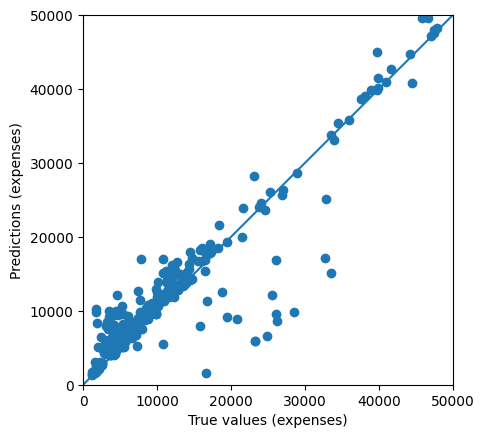

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = adapter.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = adapter.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)